In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

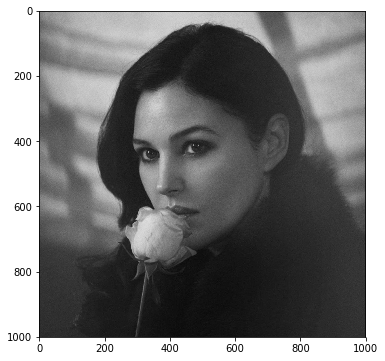

In [42]:
#convertir l'image en noir et blanc
img_nb = im.convert('LA')
plt.figure(figsize=(9, 6))
#afficher l'image
plt.imshow(img_nb)

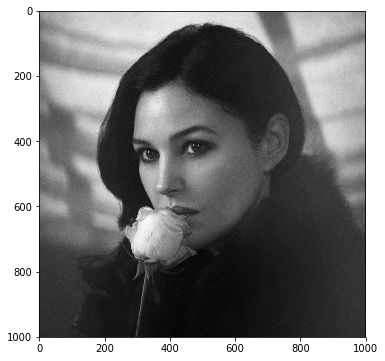

In [52]:
#convertir l'image en matrice numpy

#1- aplatir l'image en np array (ici on a seulment la 1ere bande qui contient l'information car c'est en noir et blanc)
imgmat = np.array(list(img_nb.getdata(band=0)), float)
#2 - reshape l'image en 2D
width, height = img_nb.size
imgmat.shape = (width, height)
#3- transformer l'image en matrice
imgmat = np.matrix(imgmat)

plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')

In [44]:
# calculer la svd
U, sigma, V = np.linalg.svd(imgmat)

In [45]:
print(U.shape, sigma.shape, V.shape)

(1000, 1000) (1000,) (1000, 1000)


La boucle ci-dessous montre l'image reconstruite en utilisant les k premiers vecteurs de SDV. 

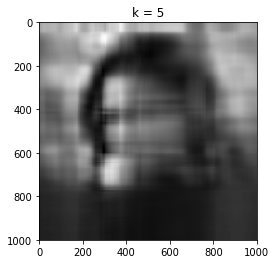

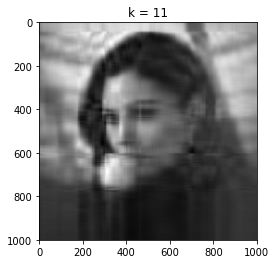

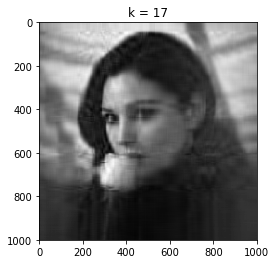

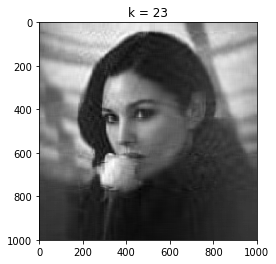

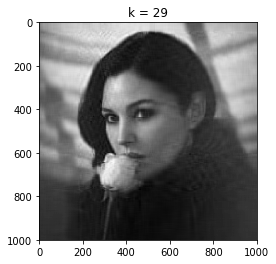

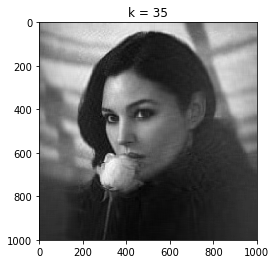

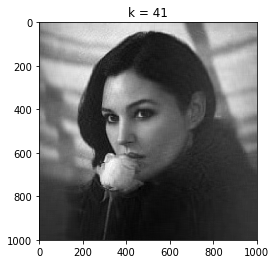

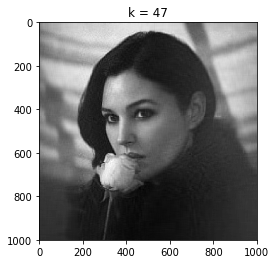

In [47]:
#borne inf de k
inf = 5
#borne sup de k
sup = 47
#number od iteration
iteration_nb = 8
loop =np.int32(np.linspace(inf, sup, iteration_nb)) 

for k in loop:
    # image reconstruite est produit matriciel des matrices de la svd en ne prenant que les k premiers vleurs et vecteurs propores 
    reconsted = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    plt.imshow(reconsted, cmap='gray')
    plt.title("k = %s" % k)
    plt.show()

**Les 47 premiers vecteurs produisent dejà une image très proche l'image d' origine !!!**

In [53]:
#calcul du taux de compression
taux = (47*width+47+47*height)/(width*height)
taux

0.094047

**On a un gain en volume de  9.4%**